<a href="https://colab.research.google.com/github/maricelaramirez2104/Challenge-Telecom-X-Latam/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenge Telecom X**

## **Telecom X - Análisis de Evasión de Clientes**

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

**¿Qué vas a practicar?**

✅ Importar y manipular datos desde una API de manera eficiente.

✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.

✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.

✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

#📌 Extracción

Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

In [1]:
%pip install -U kaleido
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

url = 'https://github.com/alura-cursos/challenge2-data-science-LATAM/raw/main/TelecomX_Data.json'
df = pd.read_json(url)
#response = requests.get(url)
#data = response.json()
#df = pd.DataFrame(data)
df.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.8 MB/s eta 0:00:00


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
# Tipo de dato de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [3]:
# Nombre de las columnas de mi dataframe
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [4]:
# Aplicar json_normalize en la columna customer
df_clientes = pd.json_normalize(df['customer'])
# Mostrar valores
df_clientes

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [5]:
# Aplicar json_normalize en la columna phone
df_phone = pd.json_normalize(df['phone'])
# Mostrar valores
df_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [6]:
# Aplicar json_normalize en la columna internet
df_internet = pd.json_normalize(df['internet'])
# Mostrar valores
df_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [7]:
# Aplicar json_normalize en la columna internet
df_account = pd.json_normalize(df['account'])
# Mostrar valores
df_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [8]:
# unir los df normalizadas con el df original
df = pd.concat([df, df_clientes, df_phone, df_internet, df_account], axis=1)
df.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
# Eliminamos las columnas originales customer, phone, internet y account
df = df.drop(['customer', 'phone', 'internet', 'account'], axis=1)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

Comprender la estructura del dataset y el significado de sus columnas.

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

---



---



Diccionario de datos

- customerID: número de identificación único de cada cliente

- Churn: si el cliente dejó o no la empresa

- gender: género (masculino y femenino)

- SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

- Partner: si el cliente tiene o no una pareja

- Dependents: si el cliente tiene o no dependientes

- tenure: meses de contrato del cliente

- PhoneService: suscripción al servicio telefónico

- MultipleLines: suscripción a más de una línea telefónica

- InternetService: suscripción a un proveedor de internet

- OnlineSecurity: suscripción adicional de seguridad en línea

- OnlineBackup: suscripción adicional de respaldo en línea

- DeviceProtection: suscripción adicional de protección del dispositivo

- TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera

- StreamingTV: suscripción de televisión por cable

- StreamingMovies: suscripción de streaming de películas

- Contract: tipo de contrato

- PaperlessBilling: si el cliente prefiere recibir la factura en línea

- PaymentMethod: forma de pago

- Charges.Monthly: total de todos los servicios del cliente por mes

- Charges.Total: total gastado por el cliente

Columnas más relevantes para el análisis:

* customerID: Esta columna es para identificar al cliente de forma unica

* Churn: Es la que nos indica si el cliente abandono o no

* ternure: Nos dice por cuanto tiempo el cliente estuvo en la empresa

* PhoneService: Columna para conocer las preferencias del cliente

* InternetService: Columna para conocer las preferencias del cliente

* TechSupport: Columna para conocer las preferencias del cliente

* StreamingTV: Columna para conocer las preferencias del cliente

* StreamingMovies: Columna para conocer las preferencias del cliente

* Contract: El tipo de contrato que tiene el cliente

* Charges.Monthly: Total de los servicios del cliente, para conocer su facturación

* Charges.Total: Todo lo que gastó el cliente en los servicios

In [10]:
# Checo la informacion de la columna Charges.Total
df['Charges.Total']

,Charges.Total
0,593.3
1,542.4
2,280.85
3,1237.85
4,267.4
...,...
7262,742.9
7263,1873.7
7264,92.75
7265,4627.65


In [11]:
# Cambiar el tipo de dato de la columna Charges.Total de object a float
df['Charges.Total'] = df['Charges.Total'].str.replace(',', '').replace('$','').replace(' ','').replace('',None).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [12]:
# checo si hay datos nulos
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [13]:
# identificar cuales son los datos nulos
df[df.isnull().any(axis=1)]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [14]:
# Se eliminan las 11 filas con datos nulos
df = df.dropna()
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [15]:
# reiniciar el indice
df = df.reset_index(drop=True)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [16]:
# checar el total de registros en mi dataframe
df.shape

(7256, 21)

In [17]:
# se checa la información
df.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
4027,5522-JBWMO,No,Male,0,No,Yes,1,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,No,Electronic check,44.00,44.00
2162,3030-YDNRM,No,Male,0,No,No,8,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.85,572.45
6204,8547-NSBBO,No,Male,0,No,No,35,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,96.75,3403.40
781,1101-SSWAG,No,Female,0,Yes,No,15,Yes,Yes,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,51.10,711.15
6612,9103-CXVOK,No,Male,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.75,19.75


In [18]:
# contar el número de valores únicos en una columna o conjunto de columnas de un DataFrame.
df.nunique()

,0
customerID,7256
Churn,3
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,72
PhoneService,2
MultipleLines,3
InternetService,3


In [19]:
# verificar datos duplicados
df.duplicated().sum()

np.int64(0)

In [20]:
# Checo la información de la columna Churn
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [21]:
# Cambiamos los valores vacios de la columna Churn
df['Churn'] = df['Churn'].replace('', np.nan)
df['Churn'].unique()

array(['No', 'Yes', nan], dtype=object)

In [22]:
# checar los datos vacios en la columna Churn
df['Churn'].isna().value_counts()

,count
Churn,
False,7032
True,224


In [23]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


In [24]:
# Checo cuales son los datos nulos en la columna Churn
df[df['Churn'].isna()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,NaN,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,NaN,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,NaN,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,NaN,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,NaN,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,9840-GSRFX,NaN,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7169,9872-RZQQB,NaN,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7200,9920-GNDMB,NaN,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7228,9955-RVWSC,NaN,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [25]:
# Cambio el contenido de la columna Churn de NaN a cero 0 ya que contiene información relevante
df['Churn'] = df['Churn'].apply(lambda x: 'No' if(x != 'Yes') & (x != 'No') else x)
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
# cambiamos el contenido de las columnas que tienen Yes/No por 1 y 0
columnas = ['Churn','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
df[columnas] = df[columnas].apply(lambda x: x.map({'Yes': 1, 'No': 0}))
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,...,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.90
7252,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70
7253,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,...,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75
7254,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,...,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65


In [27]:
# cambiamos el contenido de las columnas que tienen Yes/No y No phone service por 1 y 0
columnas = ['MultipleLines']
df[columnas] = df[columnas].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No phone service': 0}))
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.90
7252,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70
7253,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75
7254,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65


In [28]:
# cambiamos el contenido de las columnas que tienen Yes/No y No internet servicee por 1 y 0
columnas = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df[columnas] = df[columnas].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No internet service': 0}))
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7252,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7253,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7254,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [29]:
# checo si hay datos nulos
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [30]:
# contar el número de valores únicos en una columna o conjunto de columnas de un DataFrame.
df.nunique()

,0
customerID,7256
Churn,2
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,72
PhoneService,2
MultipleLines,2
InternetService,3


In [31]:
# Creamos la columna Cuentas_Diarias
Daily_Accounts = round(df['Charges.Monthly'] / 30,2)
df['Daily_Accounts'] = Daily_Accounts
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Daily_Accounts
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [32]:
df['Churn'].value_counts()

,count
Churn,
0,5387
1,1869


In [33]:
df['gender'].value_counts()

,count
gender,
Male,3669
Female,3587


In [34]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,4005
Two year,1733
One year,1518


In [35]:
df['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2445
Mailed check,1657
Bank transfer (automatic),1587
Credit card (automatic),1567


In [36]:
df['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3198
DSL,2483
No,1575


In [37]:
# Realizamos una copia del dataframe
df_normalizado = df.copy()

#📊 Carga y análisis

In [38]:
df_describe = df.describe()
df_describe

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Daily_Accounts
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.421858,0.285832,0.344542,0.342751,0.289416,0.383958,0.387955,0.593716,64.755423,2280.634213,2.158467
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.493890,0.451841,0.475252,0.474662,0.453522,0.486381,0.487318,0.491173,30.125739,2268.632997,1.004282
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.450000,400.225000,1.180000
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.340000
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.900000,3785.300000,3.000000
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [39]:
# exportamos la tabla describe
df_describe.to_csv('df_describe.csv', index=False)

In [40]:
# Tipo de dato de las columnas
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   int64  
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   int64  
 5   Dependents        7256 non-null   int64  
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   int64  
 8   MultipleLines     7256 non-null   int64  
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   int64  
 11  OnlineBackup      7256 non-null   int64  
 12  DeviceProtection  7256 non-null   int64  
 13  TechSupport       7256 non-null   int64  
 14  StreamingTV       7256 non-null   int64  
 15  StreamingMovies   7256 non-null   int64  
 16  Contract          7256 non-null   object 


In [41]:
df_normalizado.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Daily_Accounts'],
      dtype='object')

In [42]:
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Daily_Accounts
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [43]:
# Explortamos el df a csv
df_normalizado.to_csv('df_normalizado.csv', index=False)

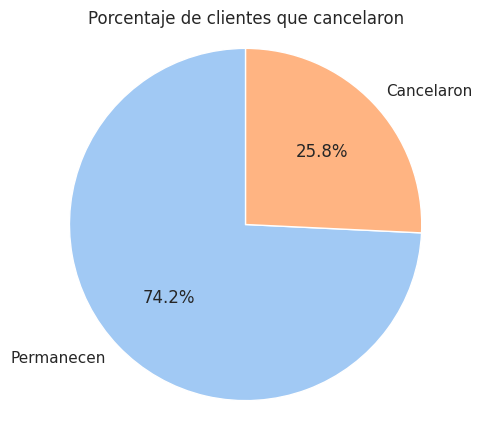

In [44]:
# Generamos los Gráficos
sns.set_theme(style="white")

# Datos para la gráfica
valores = df['Churn'].value_counts()
etiquetas = ['Permanecen', 'Cancelaron']
colores = sns.color_palette('pastel')[:2]

# Gráfica
plt.figure(figsize=(5, 5))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores) # , wedgeprops={'edgecolor': 'black'}
plt.title('Porcentaje de clientes que cancelaron')
plt.axis('equal')
plt.savefig("porcentajes_cancelacion.png", dpi=300, bbox_inches='tight')
plt.show()

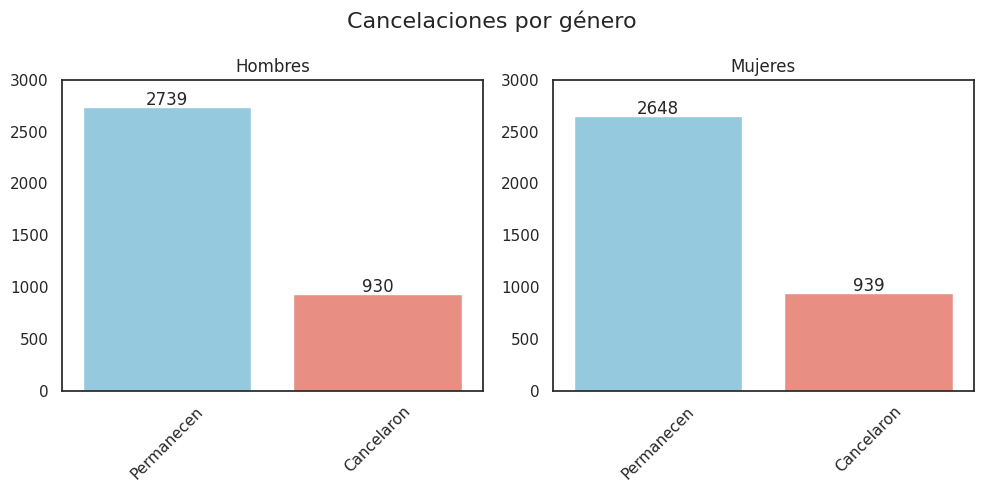

In [45]:
# Gráfico por genero
hombres = df[df['gender'] == 'Male']['Churn'].value_counts()
mujeres = df[df['gender'] == 'Female']['Churn'].value_counts()

sns.set_theme(style="white")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle('Cancelaciones por género', fontsize=16)

def plot_chart(ax, data, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=["skyblue", "salmon"],
        #edgecolor='black',
        linewidth=1,
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecen','Cancelaron'])
    ax.tick_params(axis='x',rotation=45)
    ax.set_ylim(0, 3000)
    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

plot_chart(ax1, hombres, 'Hombres')
plot_chart(ax2, mujeres, 'Mujeres')

plt.tight_layout()
plt.savefig("cancelacion_por_genero.png", dpi=300, bbox_inches='tight')
plt.show()


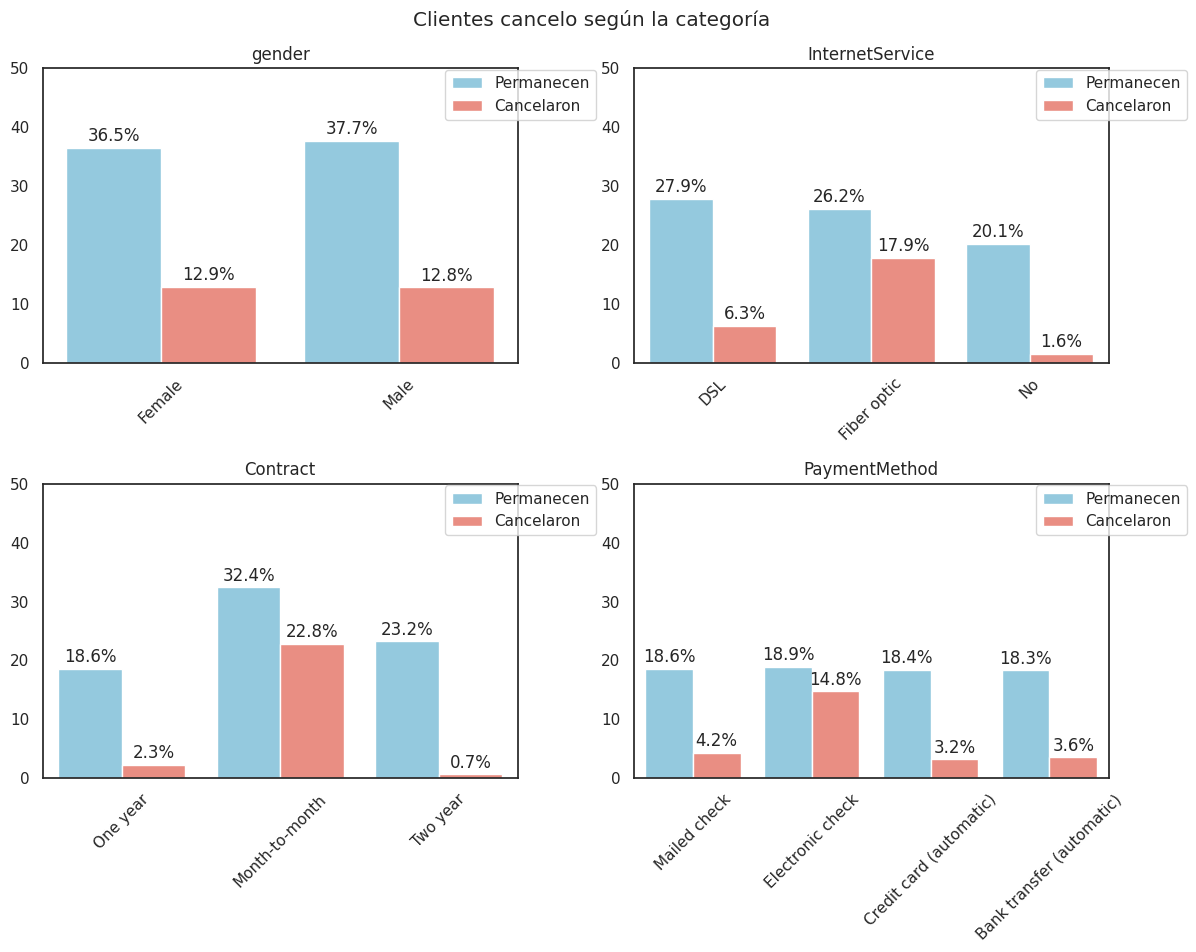

In [46]:
#Creamos lista con las columnas que analizaremos
#analisis=['Genero','servicio_internet','tipo_de_contrato','forma_pago']
analisis=['gender','InternetService','Contract','PaymentMethod']

fig, axs=plt.subplots(2, 2, figsize=(12,10))
fig.subplots_adjust(hspace=0.5,wspace=0.3)
fig.suptitle('Clientes cancelo según la categoría')
axs=axs.flatten()

#For para generacion multiples gráficas
for i, var in enumerate(analisis):
  ax=axs[i]
  ax=sns.countplot(data=df_normalizado,x=var,hue='Churn',stat='percent',ax=ax,palette=["skyblue", "salmon"])
  custom_params = {"axes.spines.right": False, "axes.spines.top": False}
  sns.set_theme(style="ticks", rc=custom_params)
  ax.set_title(f'{var}')
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_ylim(0,50)
  ax.tick_params(axis='x',rotation=45)
  ax.legend(['Permanecen','Cancelaron'],bbox_to_anchor=(1.18,1.02))

  for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2)

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.savefig("Cliente_cancelación_según_categoria.png", dpi=300, bbox_inches='tight')

plt.show()

In [47]:
#Renombramos columnas que vamos a analizar y creamos lista para filtrarlas
df_normalizado.rename(columns={'Charges.Total':'Gasto_total','Charges.Monthly':'Gasto_mensual'},inplace=True)
col_numericas=['Gasto_total','Gasto_mensual']

In [48]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   int64  
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   int64  
 5   Dependents        7256 non-null   int64  
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   int64  
 8   MultipleLines     7256 non-null   int64  
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   int64  
 11  OnlineBackup      7256 non-null   int64  
 12  DeviceProtection  7256 non-null   int64  
 13  TechSupport       7256 non-null   int64  
 14  StreamingTV       7256 non-null   int64  
 15  StreamingMovies   7256 non-null   int64  
 16  Contract          7256 non-null   object 


In [49]:
#For para generación de las graficas tipo box
for i in col_numericas:
  fig = px.box(df_normalizado,x='Churn',y=df_normalizado[i],points='all',color='Churn',notched=True)

  fig.update_layout(width=800,height=450,title=dict(text=f'Analisis de clientes que cancelaron por {i}',x=0.5,xanchor='center'),
                    xaxis_title='',yaxis_title='Total',
                    font_family='Arial',font_size=20,font_color='black',
                    xaxis=dict(tickvals = [0, 1],ticktext=['Permanecen','Cancelaron']),showlegend=False)

  #pio.write_image(fig,"Cliente_cancelación_según_categoria.png")
  fig.show()

#📄Informe final

# **Análisis de Evación de Clientes en TelecomX**

### **Introducción**

La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

El mayor desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

### **Limpíeza y Tratamiento de Datos**

El proceso inicia con la importación de los datos TelecomX_Data.json
Utilizando la librería Pandas, se realizó una exploración de los datos para entender la estructura del DataFrame

Los pasos para la limpieza de los datos fueron:

✅ Cargar los datos en un DataFrame

✅ Se reviso el tipo de dato de cada columna

✅ Se normalizaron algunas columnas para transformar datos JSON semiestructurados en una tabla plana

✅ los 11 valores nulos en la columna Charges.Total se eliminaron y se cambió el tipo de dato a float64

✅ Creación de una columna cuentas_diarias, calculando el cargo promedio diario dividiendo Charges.Monthly entre 30

✅ En la columna Churn 224 filas tenían espacio en blanco se pasaron a valor nulo y después se sustituyó por valor cero (0) ya que se consideró que los valores que tenían se deberían de considerar para el análisis que se está realizando


### **Análisis Exploratorio de Datos**

Se realizo el análisis de los datos para visualizar la distribución de las variables

✅ **gender** la visualización mostro que una proporción de clientes ha cancelado

✅ Distribución de variables categóricas

  - **gender** no hay una gran diferencia entre hombres y mujeres es muy similar
  - **Contract** demostró que las personas que tienen contrato mes a mes tienen una taza de evasión más alta
  - **PaymentMethod** el método de pago Electronic Check tiene una mayor taza de evasión

✅ Variables Numéricas

  - **Permanencia** los que contratan por mes son más propensos a cancelar
  - **Cargos Totales** los que han pagado menos son los más propensos a cancelar


## **Recomendaciones**

✅ **Los Clientes nuevos**: Son los más propensos a abandonar por lo que hay que dar promociones especiales durante los primeros meses para que quieran continuar con el contrato.

✅ **Programa de retención para contratos mensuales**: Ofrecer beneficios extras para cautivar a los nuevos clientes.

✅ **Clientes con planes más caros**: Poner atención con los clientes que tienes planes de pago más alto, para que sigan y no decidan cancelar.

✅ **Tipo de pago**: Checar cuales han sido los principales problemas al realizar sus pagos mensuales y ver cómo se puede mejorar.

✅ **La antigüedad**: entre más tiempo lleva el cliente, es menos probable que cancele.